# Exploring SST and Fronts

In [18]:
# imports
import os

import h5py

from matplotlib import pyplot as plt

from wrangler.plotting import cutout

# Load up training data

In [3]:
## B = Inputs = Div SST, SST, SSS 
        #   Targets = Divb2 

In [4]:
b_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Fronts', 'Training_Sets', 
                     'LLC4320_SST144_SSS40_trainB.h5')

In [8]:
b_train = h5py.File(b_file, 'r')
b_train.keys()

<KeysViewHDF5 ['inputs', 'targets']>

In [20]:
b_train['inputs'].shape,  b_train['targets'].shape

((1000, 3, 1, 64, 64), (1000, 1, 1, 64, 64))

In [41]:
def parse_idx(idx):
    # Parase
    div_sst = b_train['inputs'][idx, 0, 0, ...]
    sst = b_train['inputs'][idx, 2, 0, ...]
    sss = b_train['inputs'][idx, 1, 0, ...]
    #
    Divb2 = b_train['targets'][idx, 0, 0, ...]
    #
    return div_sst, sst, sss, Divb2

# Plot a few

In [42]:
def plot_example(idx):
    div_sst, sst, sss, Divb2 = parse_idx(idx)

    # Plot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    cutout.show_image(sst, clbl='SST (deg C)', ax=ax1)
    cutout.show_image(div_sst, clbl=r'|Div SST|$^2$', cm='viridis', ax=ax2)
    #cutout.show_image(sss, clbl='SSS (psu)', cm='viridis', ax=ax2)
    cutout.show_image(Divb2, clbl=r'$\nabla b^2$', cm='Greys', ax=ax3)
    #
    plt.show()

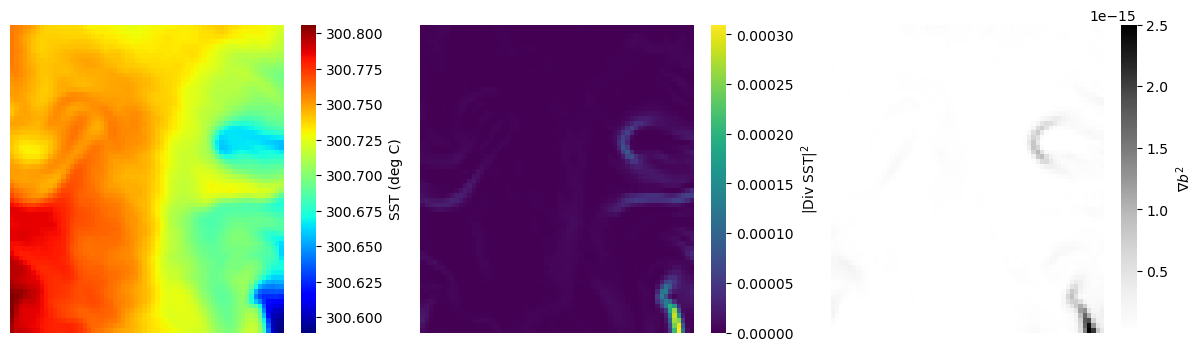

In [38]:
idx = 0
plot_example(idx)

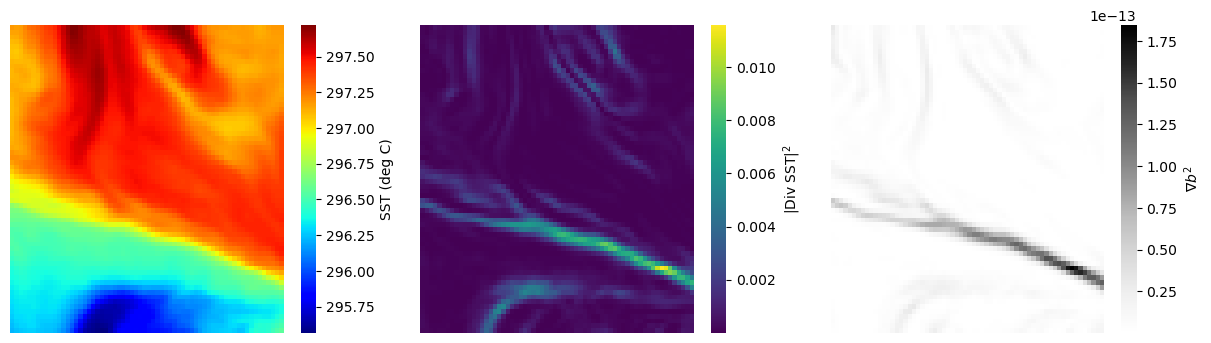

In [39]:
idx = 500
plot_example(idx)

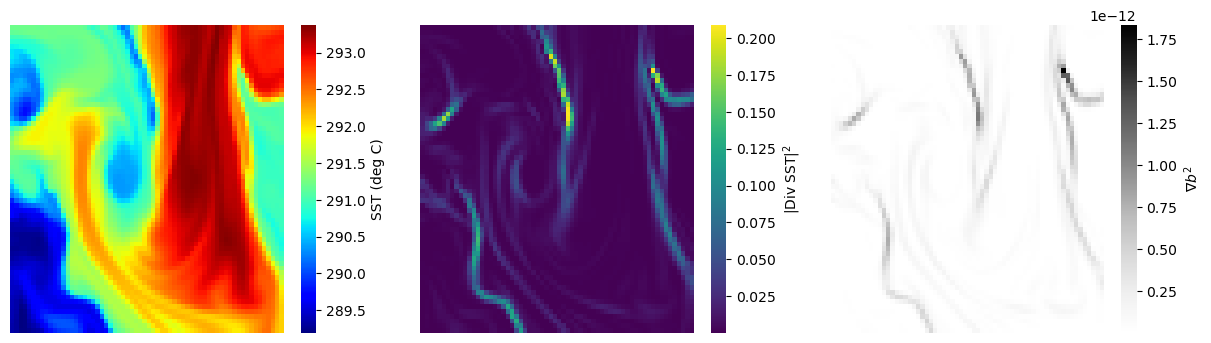

In [40]:
idx = 700
plot_example(idx)

# Scatter me plot

In [55]:
def scatter_me(idx, xmnx=None):
    div_sst, sst, sss, Divb2 = parse_idx(idx)

    # Plot
    fig = plt.figure(figsize=(5,5))
    ax = plt.gca()
    ax.scatter(div_sst, Divb2, s=0.4)
    #
    ax.set_xlabel(r'|Div SST|$^2$')
    ax.set_ylabel(r'$\nabla b^2$')
    #
    ax.set_xscale('log')
    ax.set_yscale('log')
    #
    if xmnx is not None:
        ax.set_xlim(xmnx)
    #
    plt.show()

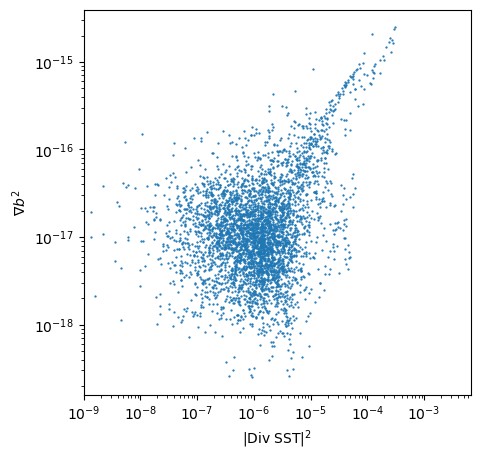

In [56]:
scatter_me(0, xmnx=(1e-9, None))

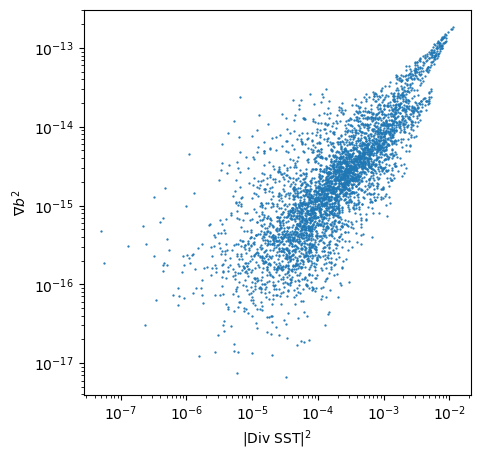

In [57]:
scatter_me(500)#, xmnx=(1e-9, None))

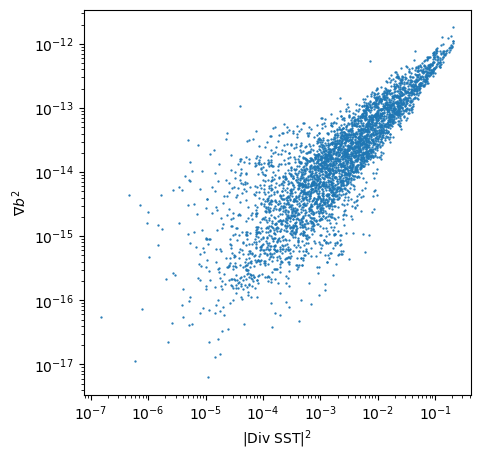

In [58]:
scatter_me(700)#, xmnx=(1e-9, None))